In [1]:
import pandas as pd
import numpy as np

In [2]:
import operator
from sklearn import linear_model,metrics
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data',sep=',',header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, 0 to 127
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [7]:
data.shape

(1994, 128)

In [8]:
data.isnull().sum().sort_values(ascending=False)

127    0
126    0
33     0
34     0
35     0
      ..
90     0
91     0
92     0
93     0
0      0
Length: 128, dtype: int64

In [9]:
data[data.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127


In [10]:
data=data.drop([3], axis=1)

In [11]:
data.head()

,0,1,2,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [12]:
num_row, num_col = data.shape
selected_column = []

for j in range(num_col-1):
    valcount = data.iloc[:,j].value_counts()
    if '?' not in valcount:
        selected_column.append(j)
    elif valcount['?'] < 0.01 * num_row:
        valmean = pd.to_numeric(data.iloc[:,j], errors='coerce').mean()
        for i in range(num_row):
            if data.iloc[i,j] == '?':
                data.iloc[i,j] = valmean
        data.iloc[:,j] = pd.to_numeric(data.iloc[:,j])
        selected_column.append(j)

In [13]:
train = np.random.choice([True, False], num_row, replace=True, p=[0.9,0.1])
x_train = data.iloc[train,selected_column].as_matrix()
y_train = data.iloc[train,-1].as_matrix()
x_test = data.iloc[~train,selected_column].as_matrix()
y_test = data.iloc[~train,-1].as_matrix()
x=np.r_[x_train,x_test]
y=np.r_[y_train,y_test]

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [14]:
RG = linear_model.LinearRegression()
RG.fit(x_train, y_train)
y_predict=RG.predict(x_test)
mse=metrics.mean_squared_error(y_test, y_predict)
dictionary_linear={}
for a in [x for x in range(len(RG.coef_)) if x != 3]:
    dictionary_linear[a]=abs(RG.coef_[a])
sorted_linear = sorted(dictionary_linear.items(), key=operator.itemgetter(1),reverse=True)
print('\t','linear regression model:')
print('MSE on test set:', mse)
print('important attributes:',sorted_linear[:2])

	 linear regression model:
MSE on test set: 0.016755035234257882
important attributes: [(66, 0.7288776473317389), (69, 0.6077198537647612)]


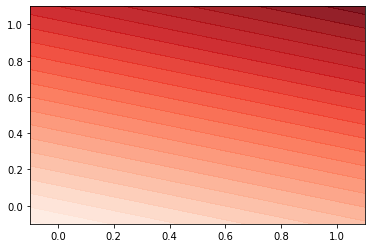

In [19]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x0 = my_linspace(min(x[:,66]), max(x[:,66]), steps)
x1 = my_linspace(min(x[:,43]), max(x[:,43]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
RG1 = linear_model.LinearRegression()
RG1.fit(x_train[:,[66,43]], y_train)
mesh_y = RG1.predict(mesh_data).reshape(steps,steps)
plt.contourf(xx0, xx1, mesh_y, 20, cmap=plt.cm.Reds, alpha=0.9)
plt.show()